<a href="https://colab.research.google.com/github/miller00315/ia_studies/blob/main/lstm_anomalias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [3]:
dataset_train = pd.read_csv('Salestrain.csv')

In [4]:
dataset_train.shape

(96, 1)

In [5]:
dataset_train

,data
0,112
1,118
2,132
3,129
4,121
...,...
91,405
92,355
93,306
94,271


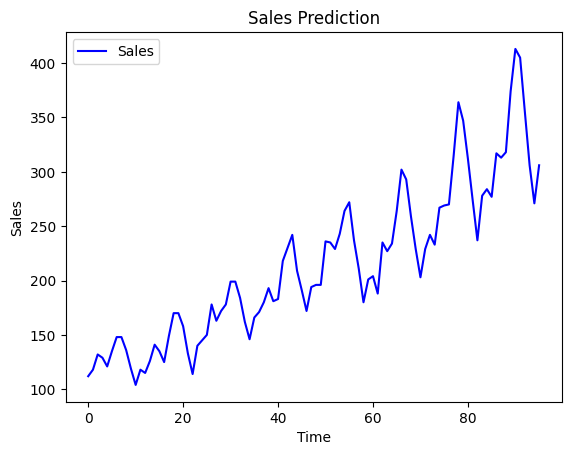

In [7]:
plt.plot(dataset_train, color = 'blue', label = 'Sales')
plt.title('Sales Prediction')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [8]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(dataset_train)

In [11]:
X_train = []
y_train = []

for i in range(90, len(training_set_scaled)):
    data = training_set_scaled[i-90:i, 0]
    X_train.append(data)
    y_train.append(training_set_scaled[i, 0])

X_train = np.array(X_train).reshape(-1, 90, 1)
y_train = np.array(y_train)

In [13]:
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [15]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=300, batch_size=1)

Epoch 1/300
6/6 [==============================] - 8s 180ms/step - loss: 0.1015
Epoch 2/300
6/6 [==============================] - 1s 180ms/step - loss: 0.0859
Epoch 3/300
6/6 [==============================] - 1s 214ms/step - loss: 0.0497
Epoch 4/300
6/6 [==============================] - 2s 337ms/step - loss: 0.0531
Epoch 5/300
6/6 [==============================] - 2s 288ms/step - loss: 0.0456
Epoch 6/300
6/6 [==============================] - 1s 188ms/step - loss: 0.0566
Epoch 7/300
6/6 [==============================] - 1s 184ms/step - loss: 0.0805
Epoch 8/300
6/6 [==============================] - 1s 186ms/step - loss: 0.0557
Epoch 9/300
6/6 [==============================] - 1s 186ms/step - loss: 0.0746
Epoch 10/300
6/6 [==============================] - 1s 190ms/step - loss: 0.0990
Epoch 11/300
6/6 [==============================] - 1s 185ms/step - loss: 0.0216
Epoch 12/300
6/6 [==============================] - 1s 185ms/step - loss: 0.0540
Epoch 13/300
6/6 [===================

In [16]:
dataset_test = pd.read_csv('Salestest.csv')

In [17]:
dataset_test.shape

(48, 1)

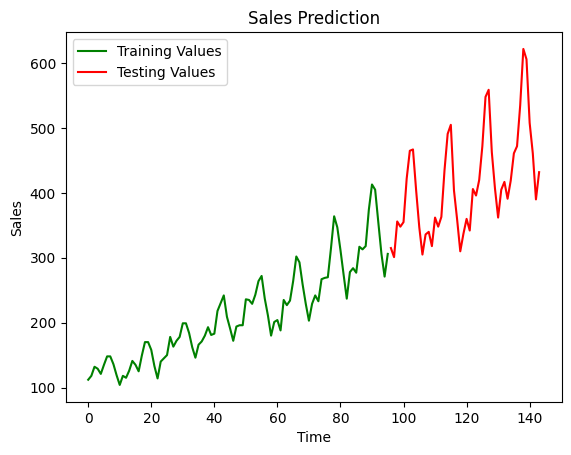

In [19]:
train_values = dataset_train['data'].values
test_values = dataset_test['data'].values

total_values = np.concatenate((train_values, test_values), axis=0)

time_index = range(len(total_values))

plt.plot(time_index[:len(train_values)], train_values, color='green', label='Training Values')
plt.plot(time_index[len(train_values):], test_values, color='red', label='Testing Values')
plt.title('Sales Prediction')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [21]:
dataset_test_anomalies = dataset_test.copy()
dataset_test_anomalies.loc[:9, 'data'] = 90
dataset_test_anomalies.loc[10:34, 'data'] = np.random.uniform(100, 200, size=(25,))
dataset_test_anomalies.loc[35:, 'data'] = 90

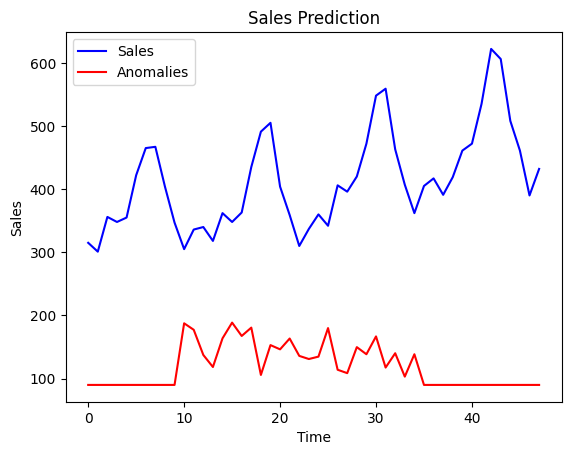

In [23]:
plt.plot(dataset_test, color = 'blue', label = 'Sales')
plt.plot(dataset_test_anomalies, color = 'red', label = 'Anomalies')
plt.title('Sales Prediction')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [24]:
dataset_total = pd.concat((dataset_train['data'], dataset_test['data']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 90:]
inputs = pd.DataFrame(inputs, columns=['data'])
inputs = sc.transform(inputs)

In [25]:
dataset_total_anomalies = pd.concat((dataset_train['data'], dataset_test_anomalies['data']), axis=0)
inputs_anomalies = dataset_total_anomalies[len(dataset_total_anomalies) - len(dataset_test_anomalies) - 90:]
inputs_anomalies = pd.DataFrame(inputs_anomalies, columns=['data'])
inputs_anomalies = sc.transform(inputs_anomalies)

In [26]:
X_test = []
X_test_anomalies = []

for i in range(90, len(inputs)):
    X_test.append(inputs[i-90:i, 0])
    X_test_anomalies.append(inputs_anomalies[i-90:i, 0])

X_test, X_test_anomalies = np.array(X_test), np.array(X_test_anomalies)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test_anomalies = np.reshape(X_test_anomalies, (X_test_anomalies.shape[0], X_test_anomalies.shape[1], 1))

In [27]:
predict_sales = model.predict(X_test)
predict_sales = sc.inverse_transform(predict_sales)

predict_sales_anomalies = model.predict(X_test_anomalies)
predict_sales_anomalies = sc.inverse_transform(predict_sales_anomalies)

2/2 [==============================] - 0s 53ms/step


In [28]:
mse_test = mean_squared_error(test_values, predict_sales)
mse_test_anomalies = mean_squared_error(dataset_test_anomalies['data'], predict_sales_anomalies)

print(f"MSE for test data: {mse_test}")
print(f"MSE for test data with anomalies: {mse_test_anomalies}")

MSE for test data: 9399.997956247613
MSE for test data with anomalies: 37203.414363235825


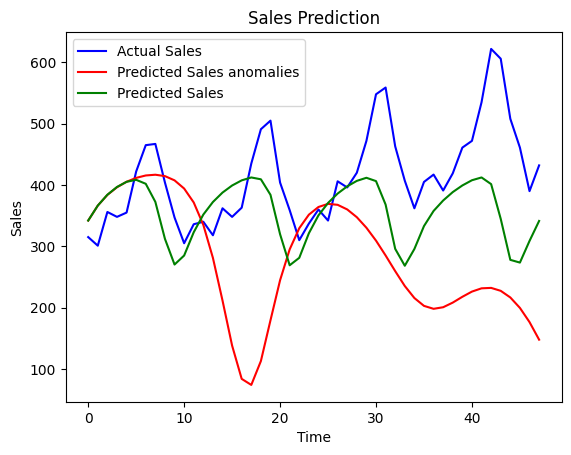

In [30]:
plt.plot(test_values, color='blue', label='Actual Sales')
plt.plot(predict_sales_anomalies, color='red', label='Predicted Sales anomalies')
plt.plot(predict_sales, color='green', label='Predicted Sales')
plt.title('Sales Prediction')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()